In [1]:
###Classification problem (setup)
import numpy as np
from math import pi
def simulate_sine_data(n, ease=2): 
    x1 = -1 + 2 * np.random.random(n)
    x2 = -1 + 2 * np.random.random(n)
    X = np.stack((x1, x2), axis =1)
    diff = x2 - 0.75*np.sin(2*pi**x1)
    prob = 1 / (1+np.exp(-ease*diff))
    y = np.where(np.random.random(n)<prob, +1, -1)
    return X, y

np.random.seed(seed=123)
X, y = simulate_sine_data(250)

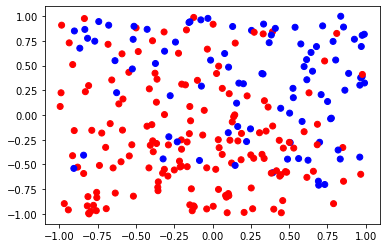

In [2]:
###Plot the above data
import matplotlib.pyplot as plt
col = np.where(y==-1, "red", "blue")
plt.scatter(X[:,0], X[:,1], color=col)
plt.show()

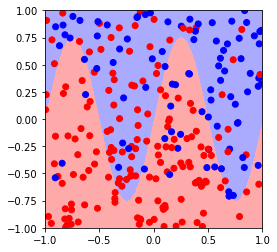

In [3]:
##To illustrate signal, we will add an image background to the plot
from matplotlib.colors import ListedColormap
xnew = np.linspace(-1, 1, 1000)
Xnew1, Xnew2 = np.meshgrid(xnew, xnew)
Ynew = Xnew2 - 0.75*np.sin(2*pi*Xnew1)>0
plt.imshow(Ynew, origin='lower', extent=[-1, 1, -1, 1],
cmap = ListedColormap(['#ffaaaa', '#aaaaff']))
plt.scatter(X[:,0], X[:,1], color=col)
plt.show()

In [4]:
##We can now fit a support vector classification machine to the data
from sklearn.svm import SVC
model = SVC()
model.fit(X, y)


SVC()

In [5]:
#Instead of using the import statement above, we could have used
from sklearn import svm
model = svm.SVC()
model.fit(X, y)

SVC()

In [6]:
#We can predict the labels for training data from the above example using the following
yhat = model.predict(X)
#To plot the model we have learned, we can create the matrix Xnew 
Xnew = np.stack((Xnew1.flatten(), Xnew2.flatten()), axis=1)
ynewhat = model.predict(Xnew)

In [7]:
#in order to plot into an image plot we need to reshape them to a wide layout.
ynewhat = ynewhat.reshape((1000,1000))

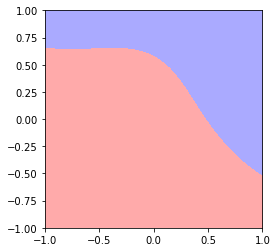

In [8]:
plt.imshow(ynewhat, origin='lower', extent=[-1, 1, -1, 1],
cmap = ListedColormap(['#ffaaaa', '#aaaaff']))

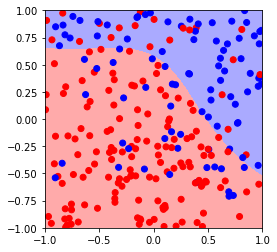

In [9]:
plt.imshow(ynewhat, origin='lower', extent=[-1, 1, -1, 1],
cmap = ListedColormap(['#ffaaaa', '#aaaaff']))
plt.scatter(X[:,0], X[:,1], color=col)
plt.show()

In [10]:
print(model.score(X, y))

0.784


In [11]:
##Calculate the accuracy score of the model using the below
from sklearn.metrics import accuracy_score
yhat = model.predict(X)
print(accuracy_score(y, yhat))

0.784


In [12]:
from sklearn.metrics import f1_score
print(f1_score(y, yhat))

0.6823529411764706


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, yhat))

              precision    recall  f1-score   support

          -1       0.81      0.87      0.84       159
           1       0.73      0.64      0.68        91

    accuracy                           0.78       250
   macro avg       0.77      0.75      0.76       250
weighted avg       0.78      0.78      0.78       250



In [14]:
#5 fold cross validation
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(SVC(), X, y, scoring="accuracy", cv=5)
print(cv_acc)

[0.74 0.76 0.76 0.78 0.74]


In [15]:
#To obtain a single estimate of the 5-fold cross validation, we can use the mean
print(np.mean(cv_acc))

0.756


In [16]:
#Support vector machines with a radial function kernal have two hyperparameters
model = SVC(gamma=500, C=1e3)
model.fit(X, y)

SVC(C=1000.0, gamma=500)

In [17]:
print(model.score(X, y))

1.0


In [18]:
print(np.mean(cross_val_score(SVC(gamma=500, C=1e3),
                             X, y, scoring="accuracy", cv=5)))

0.648


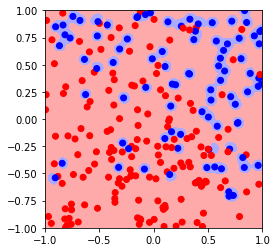

In [19]:
#Plot the decision boundary
ynewhat = model.predict(Xnew)
ynewhat = ynewhat.reshape((1000,1000))
plt.imshow(ynewhat, origin='lower', extent=[-1, 1, -1, 1],
cmap = ListedColormap(['#ffaaaa', '#aaaaff']))
plt.scatter(X[:,0], X[:, 1], color=col)
plt.show()

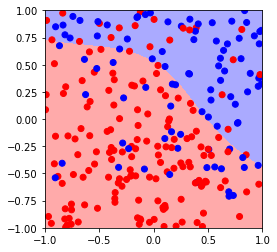

In [20]:
#Example 7
#Use the GridSearchCV to search the best hyperparameters
from sklearn.model_selection import GridSearchCV
grid = { 'C':[1, 10, 100, 1000], 
       "gamma": [0.1,1, 10] }
model = GridSearchCV(SVC(), grid, scoring="accuracy", cv=5)
model.fit(X, y)
ynewhat = model.predict(Xnew)
ynewhat = ynewhat.reshape((1000,1000))
plt.imshow(ynewhat, origin='lower', extent=[-1, 1, -1, 1],
cmap = ListedColormap(['#ffaaaa', '#aaaaff']))
plt.scatter(X[:, 0], X[:,1], color=col)
plt.show()


In [21]:
print(model.best_params_)
print(model.best_score_)

{'C': 1, 'gamma': 1}
0.772


In [22]:
#Example 8 - toy classification problem
X_noise = -1+2*np.random.random((X.shape[0], 98))
X_big = np.concatenate((X, X_noise), axis=1)

In [23]:
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif

In [24]:
fs_model = GenericUnivariateSelect(mutual_info_classif, "k_best", 2)
fs_model.fit(X_big, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass mode=k_best, param=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


GenericUnivariateSelect(mode='k_best', param=2,
                        score_func=<function mutual_info_classif at 0x000001AAB722ED30>)

In [25]:
print(fs_model.get_support())

[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


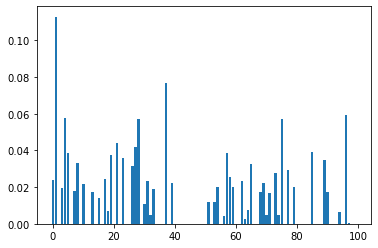

In [26]:
##The score for the individual covariates can be visualised in a plot
import matplotlib.pyplot as plt 
plt.bar(range(100), fs_model.scores_)
plt.show()

In [27]:
##Reduce the dataset by calling the transform method
X_reduced = fs_model.transform(X_big)
print(X_big[:5, :2])

[[ 0.39293837 -0.58350341]
 [-0.42772133 -0.1132646 ]
 [-0.54629709  0.43120255]
 [ 0.10262954 -0.17896043]
 [ 0.43893794 -0.61798609]]


In [28]:
##Example 9 
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfe_model = RFE(RandomForestClassifier(n_estimators=100),
n_features_to_select=2, step=1)
rfe_model.fit(X_big, y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=2)

In [29]:
print(rfe_model.get_support())

[ True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


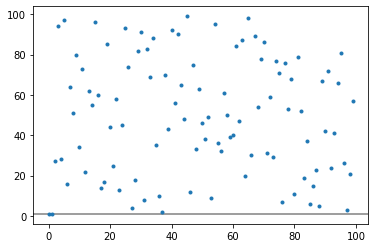

In [30]:
import matplotlib.pyplot as plt
plt.axhline(1, color="gray")
## <matplotlib.lines.Line2D object at 0x00000190E11E7BA8>
plt.plot(rfe_model.ranking_, ".")
## [<matplotlib.lines.Line2D object at 0x00000190D1719080>]
plt.show()

In [31]:
np.random.seed(123)
from sklearn.feature_selection import RFECV
rfecv_model = RFECV(RandomForestClassifier(n_estimators=100), cv=5, step=1)
rfecv_model.fit(X_big, y)
print(rfecv_model.get_support())

[ True  True False False False False  True False False False  True False
 False False False False False  True  True False False False False  True
 False False False  True False False False  True False False False False
  True  True False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True False False False  True False False False False False False False
 False  True  True False  True False False False False False False False
 False  True False False]


In [32]:
##Continue from page 15
import numpy as np
import pandas as pd

In [33]:
saheart = pd.read_csv("saheart.csv")
print(saheart.head())

   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11        1     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61        0     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28        1     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03        1     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78        1     60    25.99    57.34   49    1


In [34]:
X = saheart.loc[:,:"age"].values
y = saheart.chd.values

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid = { 'C':[0.1, 1, 10, 100, 1000] }
model = GridSearchCV(LogisticRegression(penalty="l2", max_iter=1000),
grid, scoring="accuracy", cv=5)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, scoring='accuracy')

In [37]:
print(model.best_params_)

{'C': 0.1}


In [38]:
print(model.best_estimator_.coef_)

[[ 0.00649316  0.06942231  0.14816511  0.0267999   0.5557384   0.03852148
  -0.06911255 -0.00234909  0.04356857]]


In [39]:
coef = pd.Series(model.best_estimator_.coef_[0,:])
coef.index = saheart.columns[:-1]
print(coef)

sbp          0.006493
tobacco      0.069422
ldl          0.148165
adiposity    0.026800
famhist      0.555738
typea        0.038521
obesity     -0.069113
alcohol     -0.002349
age          0.043569
dtype: float64


In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, model.predict(X_train)))

0.7317073170731707


In [41]:
print(accuracy_score(y_test, model.predict(X_test)))

0.7526881720430108


In [42]:
import pandas as pd
cookies = pd.read_csv("cookies.csv")
print(cookies.head())

   wl1100nm  wl1102nm  wl1104nm  wl1106nm  wl1108nm  wl1110nm  wl1112nm  \
0  0.248975  0.249667  0.255805  0.253688  0.246978  0.250256  0.253255   
1  0.254156  0.262365  0.261925  0.255628  0.253986  0.264546  0.260539   
2  0.279691  0.282223  0.288821  0.278705  0.274278  0.278638  0.269461   
3  0.255917  0.254177  0.249775  0.237539  0.242917  0.239558  0.234574   
4  0.247393  0.244854  0.246599  0.243579  0.237455  0.239897  0.254310   

   wl1114nm  wl1116nm  wl1118nm  ...  wl2482nm  wl2484nm  wl2486nm  wl2488nm  \
0  0.243442  0.250057  0.255633  ...  1.657958  1.665407  1.653089  1.655950   
1  0.256136  0.267225  0.261694  ...  1.690517  1.688310  1.685773  1.682672   
2  0.280186  0.278205  0.270916  ...  1.634335  1.635600  1.632152  1.622758   
3  0.246208  0.247043  0.238083  ...  1.542907  1.543930  1.546018  1.540150   
4  0.242435  0.236720  0.239953  ...  1.554825  1.568474  1.569346  1.556783   

   wl2490nm  wl2492nm  wl2494nm  wl2496nm  wl2498nm  sugar  
0  1.66

In [43]:
X = cookies.iloc[:,:-1]
y = cookies.sugar

In [44]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(123) # set seed for reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [45]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
grid = { 'n_components': list(range(1, 21))}
model = GridSearchCV(PLSRegression(), grid, scoring='r2', cv=5)
model.fit(X_train, y_train)
print(model.best_params_)

{'n_components': 7}


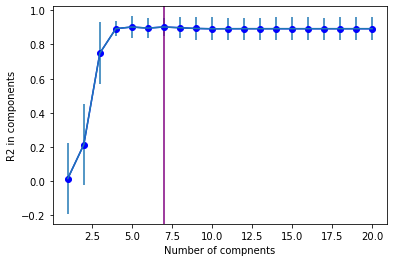

In [46]:
import matplotlib.pyplot as plt
plt.axvline(model.best_params_["n_components"], color="purple")
plt.plot(range(1,21), model.cv_results_["mean_test_score"], "bo-")
plt.errorbar(range(1,21), model.cv_results_["mean_test_score"],
            yerr=model.cv_results_["std_test_score"])
plt.xlabel("Number of compnents")
plt.ylabel("R2 in components")
plt.show()

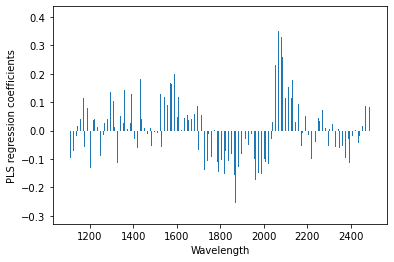

In [47]:
import numpy as np
plt.bar(range(1100, 2500, 2), model.best_estimator_.coef_[:,0])
plt.xlabel("Wavelength")
plt.ylabel("PLS regression coefficients")
plt.show()

In [48]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_train, yhat_train))
print(r2_score(y_test, yhat_test))

0.9903742784643481
0.9655080137711745


In [49]:
##Comparing principle component analysis 
import numpy as np
np.random.seed(123)
population1 = np.stack((np.random.normal(0, 1, 100),
np.random.normal(-1, 0.1, 100)), axis=1)
population2 = np.stack((np.random.normal(0, 1, 100),
np.random.normal(1, 0.1, 100)), axis=1)
X = np.concatenate((population1, population2), axis=0) @ np.array([[1, 1],[0,1]])
X = np.random.uniform(size=(1000,2))@ np.array([[1, 1],[0,1]])

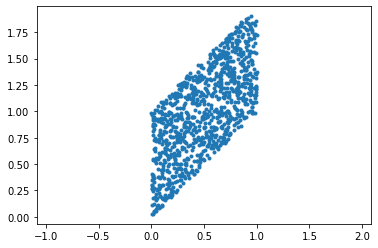

In [50]:
import matplotlib.pyplot as plt
plt.plot(X[:,0], X[:,1], ".")
plt.axis("equal")
plt.show()

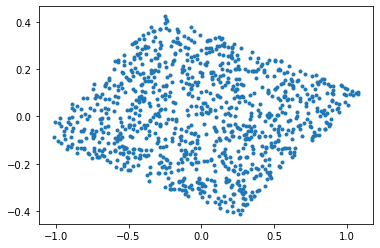

In [51]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_model.fit(X)
Z = pca_model.transform(X)
plt.plot(Z[:,0], Z[:,1], ".")

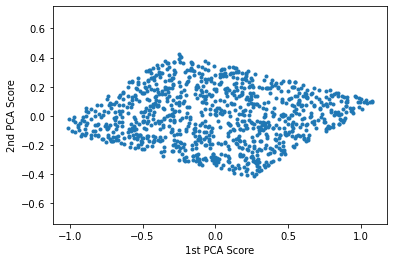

In [52]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_model.fit(X)
Z = pca_model.transform(X)
plt.plot(Z[:, 0], Z[:,1], ".")
plt.axis("equal")
plt.xlabel("1st PCA Score")
plt.ylabel("2nd PCA Score")
plt.show()

In [53]:
print(pca_model.components_)
print(pca_model.explained_variance_ratio_)

[[-0.52130392 -0.8533711 ]
 [ 0.8533711  -0.52130392]]
[0.8690929 0.1309071]


In [54]:
from sklearn.decomposition import FastICA
ica_model = FastICA(n_components=2)
ica_model.fit(X)

FastICA(n_components=2)

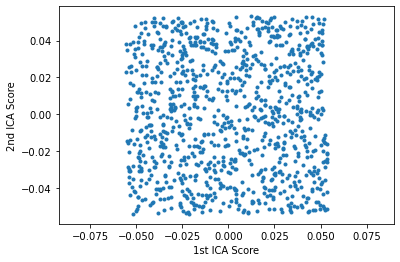

In [55]:
Z = ica_model.transform(X)
plt.plot(Z[:,0], Z[:,1], ".")
plt.axis("equal")
plt.xlabel("1st ICA Score")
plt.ylabel("2nd ICA Score")
plt.show()

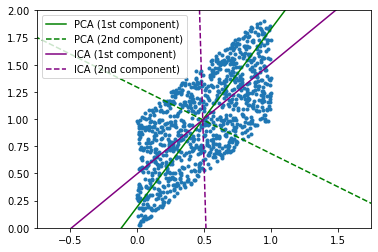

In [56]:
plt.plot(X[:,0], X[:,1], ".")
plt.xlim(-0.75, 1.75)
plt.ylim(0,2)
plt.autoscale(False)
def plot_direction(loadings, color, linestyle, label):
    coef = np.linspace(-100, 100, 1000)
    plt.plot(X[:,0].mean()+coef*loadings[0],
             X[:,1].mean()+coef*loadings[1],
             color, label=label, linestyle=linestyle)
plot_direction(pca_model.components_[0,:], "green", "-", "PCA (1st component)")
plot_direction(pca_model.components_[1,:], "green", "--", "PCA (2nd component)")
plot_direction(ica_model.mixing_[:,0], "purple", "-", "ICA (1st component)")
plot_direction(ica_model.mixing_[:,1], "purple", "--", "ICA (2nd component)")
plt.legend()
plt.show()

In [57]:
#Example 13:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.data
persons = faces.target


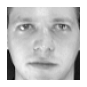

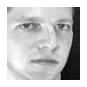

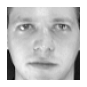

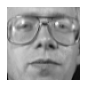

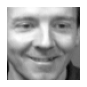

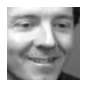

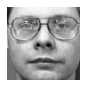

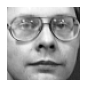

In [58]:
import matplotlib.pyplot as plt
for idx, face_idx in enumerate([0, 1, 0, 11,20,21,30,31]):
    plt.subplot(2,4,idx+1)
    plt.imshow(X[face_idx,].reshape((64,64)), cmap="gray")
    plt.axis("off")
    plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k = range(2, 150)
np.random.seed(123)

def get_silhouette_score(k):
    model = KMeans(n_clusters=k)
    model.fit(X)
    cluster = model.labels_
    return silhouette_score(X, cluster)
scores = list(map(get_silhouette_score, k))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k, scores, ".-")
plt.show()

In [ ]:
np.random.seed(1234)
model = KMeans(n_clusters=120)
model.fit(X)

cluster = model.labels_

In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score
print(homogeneity_score(persons, cluster))

In [ ]:
print(completeness_score(persons, cluster))

In [ ]:
def show_clusters(cluster):
for idx in range(6):
    examples = np.where(cluster==idx)[0][0:8]
    for pos, example in enumerate(examples):
        plt.subplot(6, 8, 8*idx+pos+1)
        img = X[example,:].reshape((64,64))
        plt.imshow(img, cmap="gray")
        plt.axis("off")
    plt.show()
show_clusters(cluster)

In [ ]:
np.random.seed(12345)
model = KMeans(n_clusters=40)
model.fit(X)
cluster = model.labels_
print(homogeneity_score(persons, cluster))
print(completeness_score(person, cluster))
show_clusters(cluster)

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.data
persons = faces.target
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(123)
person_idx_train, person_idx_test = train_test_split(range(40), test_size=0.2)
idx_train = np.isin(persons, person_idx_train).nonzero()[0]
idx_test = np.isin(persons, person_idx_test).nonzero()[0]
X_train = X[idx_train,:]
persons_train = persons[idx_train]
X_test = X[idx_test,:]
persons_test = persons[idx_test]

In [ ]:
flipped = np.random.random(X_test.shape[0])<0.5
X_test[flipped,:] = np.apply_along_axis(lambda row:
                                        np.flip(row.reshape((64,64)),0).reshape(4096),
                                        1, X_test[flipped,:])

In [ ]:
from sklearn.svm import OneClassSVM
model_ocsvm = OneClassSVM(gamma=0.01, nu=0.1)
model_ocsvm.fit(X_train)
from sklearn.metrics import confusion_matrix
novel_train = np.ones(X_train.shape[0])
novel_train_hat = model_ocsvm.predict(X_train)
print(np.mean(novel_train_hat==novel_train))

In [ ]:
print(confusion_matrix(novel_train_hat, novel_train))

##Look at test data and calculate the proportions of observations in the test
novel_test = np.where(flipped, -1, 1)
novel_test_hat = model_ocsvm.predict(X_test)
print(np.mean(novel_test_hat==novel_test))

In [ ]:
print(confusion_matrix(novel_test_hat, novel_test))
#Create a plot of some of the faces in the test data 
for idx in range(48):
    plt.subplot(6, 8, idx+1)
    if novel_test_hat[idx]==novel_test[idx]:
        cmap="Greens"
    else:
        cmap="Reds"
    plt.imshow(-X_test[idx,].reshape((64,64)), cmap=cmap)
    plt.axis("off")
plt.show()


In [ ]:
##Continue from Example 15
import pandas as pd
import numpy as np
X = pd.DataFrame({"X1": ["a","a","a","b","b","b"],
                  "X2": ["a","b","b","a","c","c"]})
print(X)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder() # Create transformation
X_transformed = ohe.fit_transform(X) # Fit and transform X
print(X_transformed) # print result as sparse matrix
print(X_transformed.toarray())

In [ ]:
###Consider a simple example of a data set with two numerical columns.
import pandas as pd
import numpy as np
X = pd.DataFrame({"X1": np.random.normal(1, 2, 10),
"X2": np.random.normal(0, 3, 10)})
print(X.head())
print(X.mean(axis=0))
print(X.std(axis=0))
from sklearn.preprocessing import StandardScaler
stand = StandardScaler() # Create transformation
X_transformed = stand.fit_transform(X) # Fit and transform X
print(X_transformed.mean(axis=0)) # Check column means are now 0
print(X_transformed.std(axis=0)) # Check column stdevs are now 0

In [ ]:
###Consider a simple example of a data set with two numerical columns.
import pandas as pd
X = pd.DataFrame({"X1": [1, 2, 2, 3, np.nan, 4, 1],
"X2": [1, np.nan, -1, 0, np.nan, -2, -1]})
print(X)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median") # Create imputer
X_transformed = imp.fit_transform(X) # Fit and transform X
print(X_transformed)

In [ ]:
###Suppose we want to take the logarithm, a common transform, of all columns of a data set.
import pandas as pd
import numpy as np
X = pd.DataFrame({"X1": np.random.exponential(1, 10),
"X2": np.random.exponential(1, 10)})
print(X)
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(np.log) # Create transformer, which takes logs
X_transformed = ft.fit_transform(X) # Fit and transform X
print(X_transformed)

In [ ]:
##Example 19 - page 33
import pandas as pd
import numpy as np
X = pd.DataFrame({"X1": np.random.normal(1, 2, 10),
"X2": [1, 2, 3, np.nan, 5, 6, 7, 8, np.nan, 10],
"X3": ["a", "a", "a", "b", "b", "b", "c", "c", "c", "a"],
"X4": np.random.exponential(1, 10)})

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
ctf = ColumnTransformer([ ("standardiseX1", StandardScaler(), ["X1"]),
("imputeX2", SimpleImputer(strategy="constant",
fill_value=0),
["X2"]),
("onehotencX3", OneHotEncoder(), ["X3"]) ])
X_transformed = ctf.fit_transform(X)
print(X_transformed)

In [ ]:
##Use Scikit-learn on the model
import pandas as pd
munichrent = pd.read_csv("munichrent.csv")
print(munichrent.head())
y = munichrent.rentsqm
X = munichrent.loc[:,"area":"cheating"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ctf = ColumnTransformer([ ("area_yearc", "passthrough", ["area", "yearc"]),
("location_bath_kitchen_cheating",
OneHotEncoder(), ["location", "bath", "kitchen",
"cheating"] ) ])
X_train_transformed = ctf.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
lreg = LinearRegression().fit(X_train_transformed, y_train)
y_hat_train = lreg.predict(X_train_transformed)

print(lreg.coef_)
from sklearn.metrics import r2_score
print(r2_score(y_train, y_hat_train))

X_test_transformed = ctf.fit_transform(X_test)
y_hat_test = lreg.predict(X_test_transformed)
print(r2_score(y_test, y_hat_test))

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
ctf = ColumnTransformer([ ("area_yearc", "passthrough", ["area", "yearc"]),
("location_bath_kitchen_cheating",
OneHotEncoder(), ["location", "bath", "kitchen",
"cheating"] ) ])
lreg = LinearRegression()
pipeline = Pipeline((("transform", ctf),
("model", lreg)))

pipeline.fit(X_train, y_train)

y_hat_train = pipeline.predict(X_train)
y_hat_test = pipeline.predict(X_test)